In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/raw_data/online_shoppers_intention.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")


Dataset loaded successfully!
Shape: (12330, 18)


Data Exploration

In [22]:

print("Dataset Info:")
print(df.info())
print("\n" + "="*50 + "\n")

print("First 5 rows:")
print(df.head())
print("\n" + "="*50 + "\n")

print("Dataset shape:", df.shape)
print("Column names:", df.columns.tolist())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficT

Data Quality Check

In [23]:

print("Missing values:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

print("Data types:")
print(df.dtypes)
print("\n" + "="*50 + "\n")

print("Basic statistics for numerical columns:")
print(df.describe())


Missing values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


Data types:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser        

Target Variable Analysis

Revenue distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64

Revenue percentage:
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


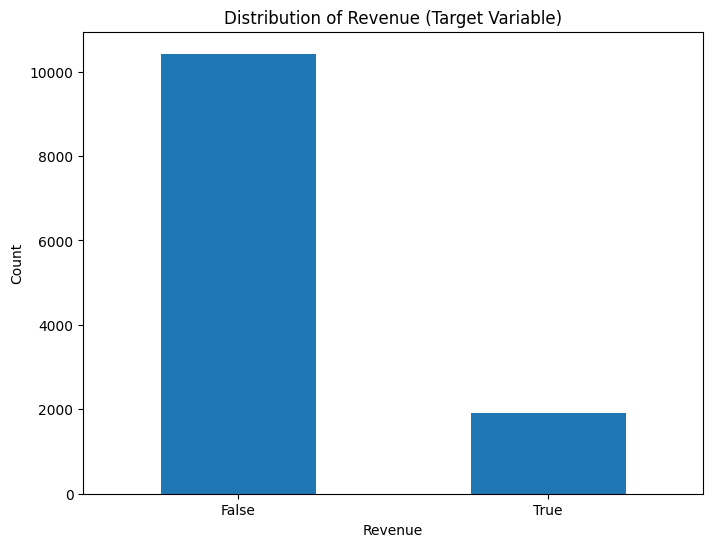

In [24]:

print("Revenue distribution:")
print(df['Revenue'].value_counts())
print("\nRevenue percentage:")
print(df['Revenue'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 6))
df['Revenue'].value_counts().plot(kind='bar')
plt.title('Distribution of Revenue (Target Variable)')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Categorical Variables Analysis

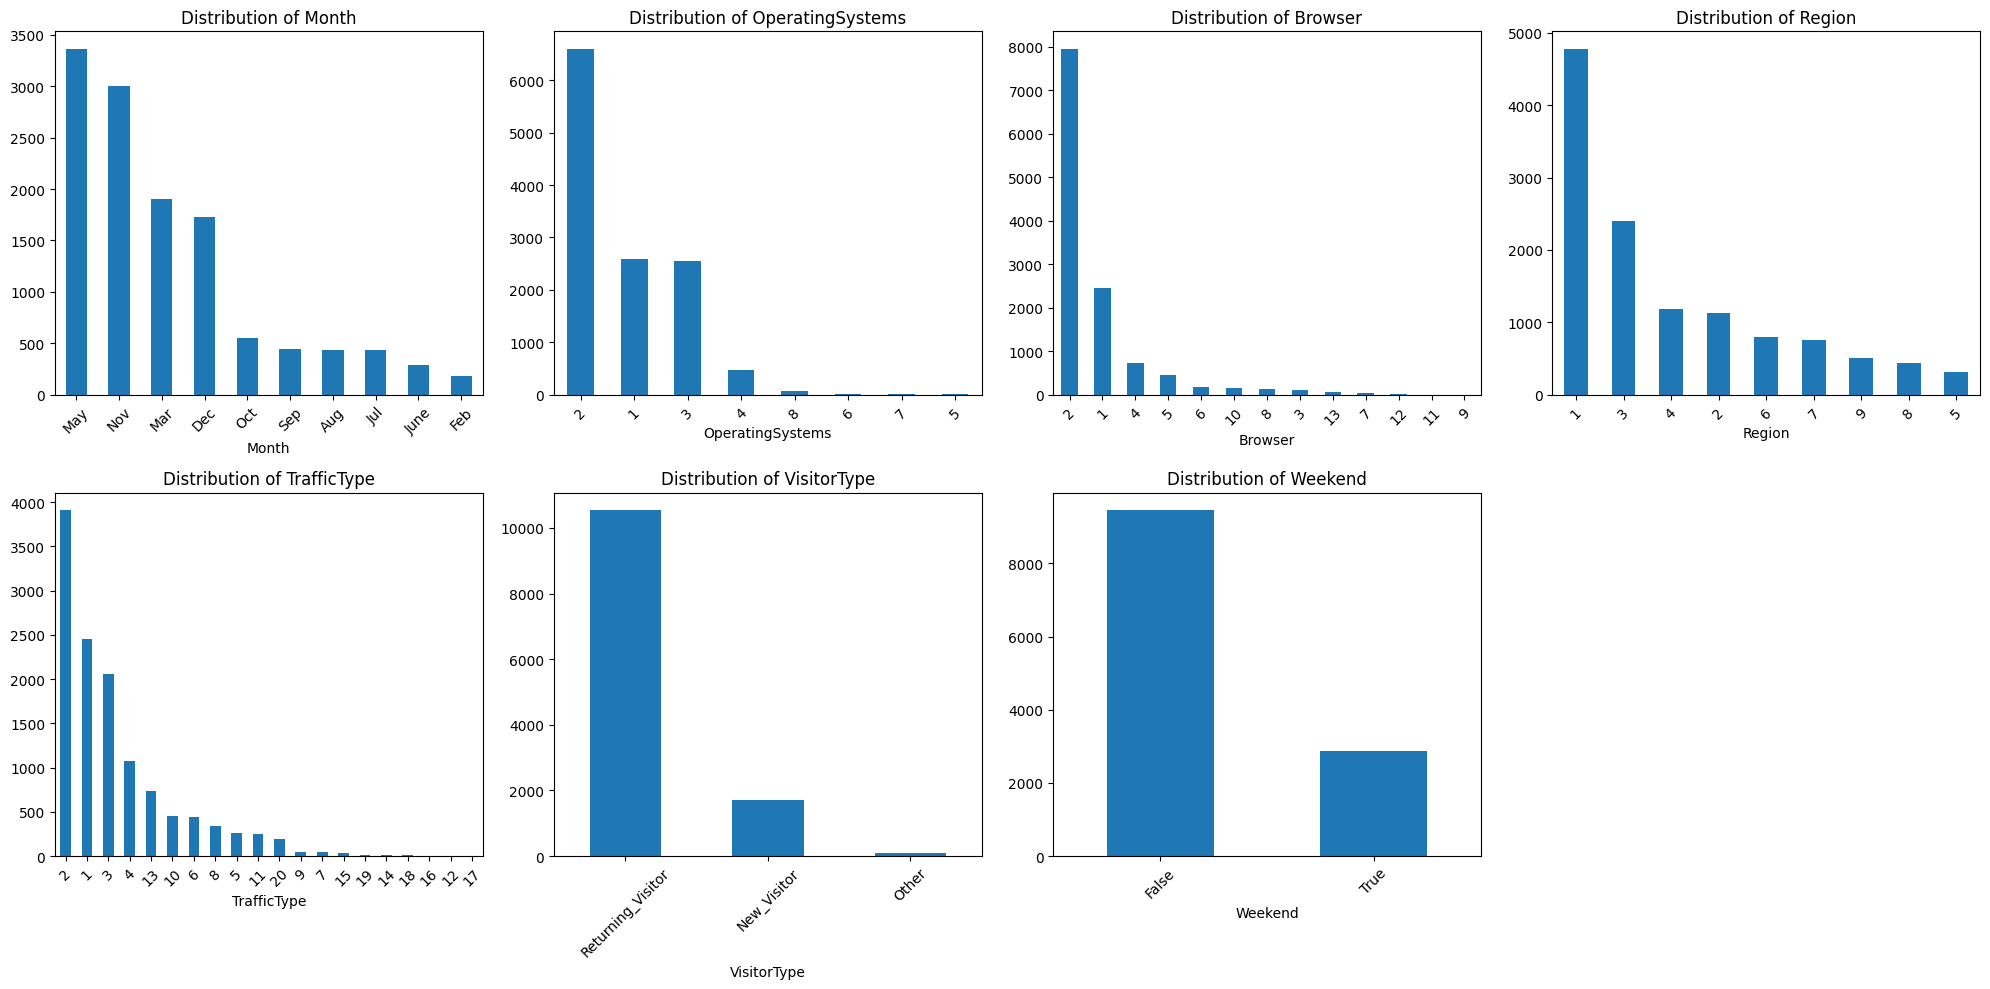

In [25]:

categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        df[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)

if len(categorical_cols) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


Numerical Variables Distribution

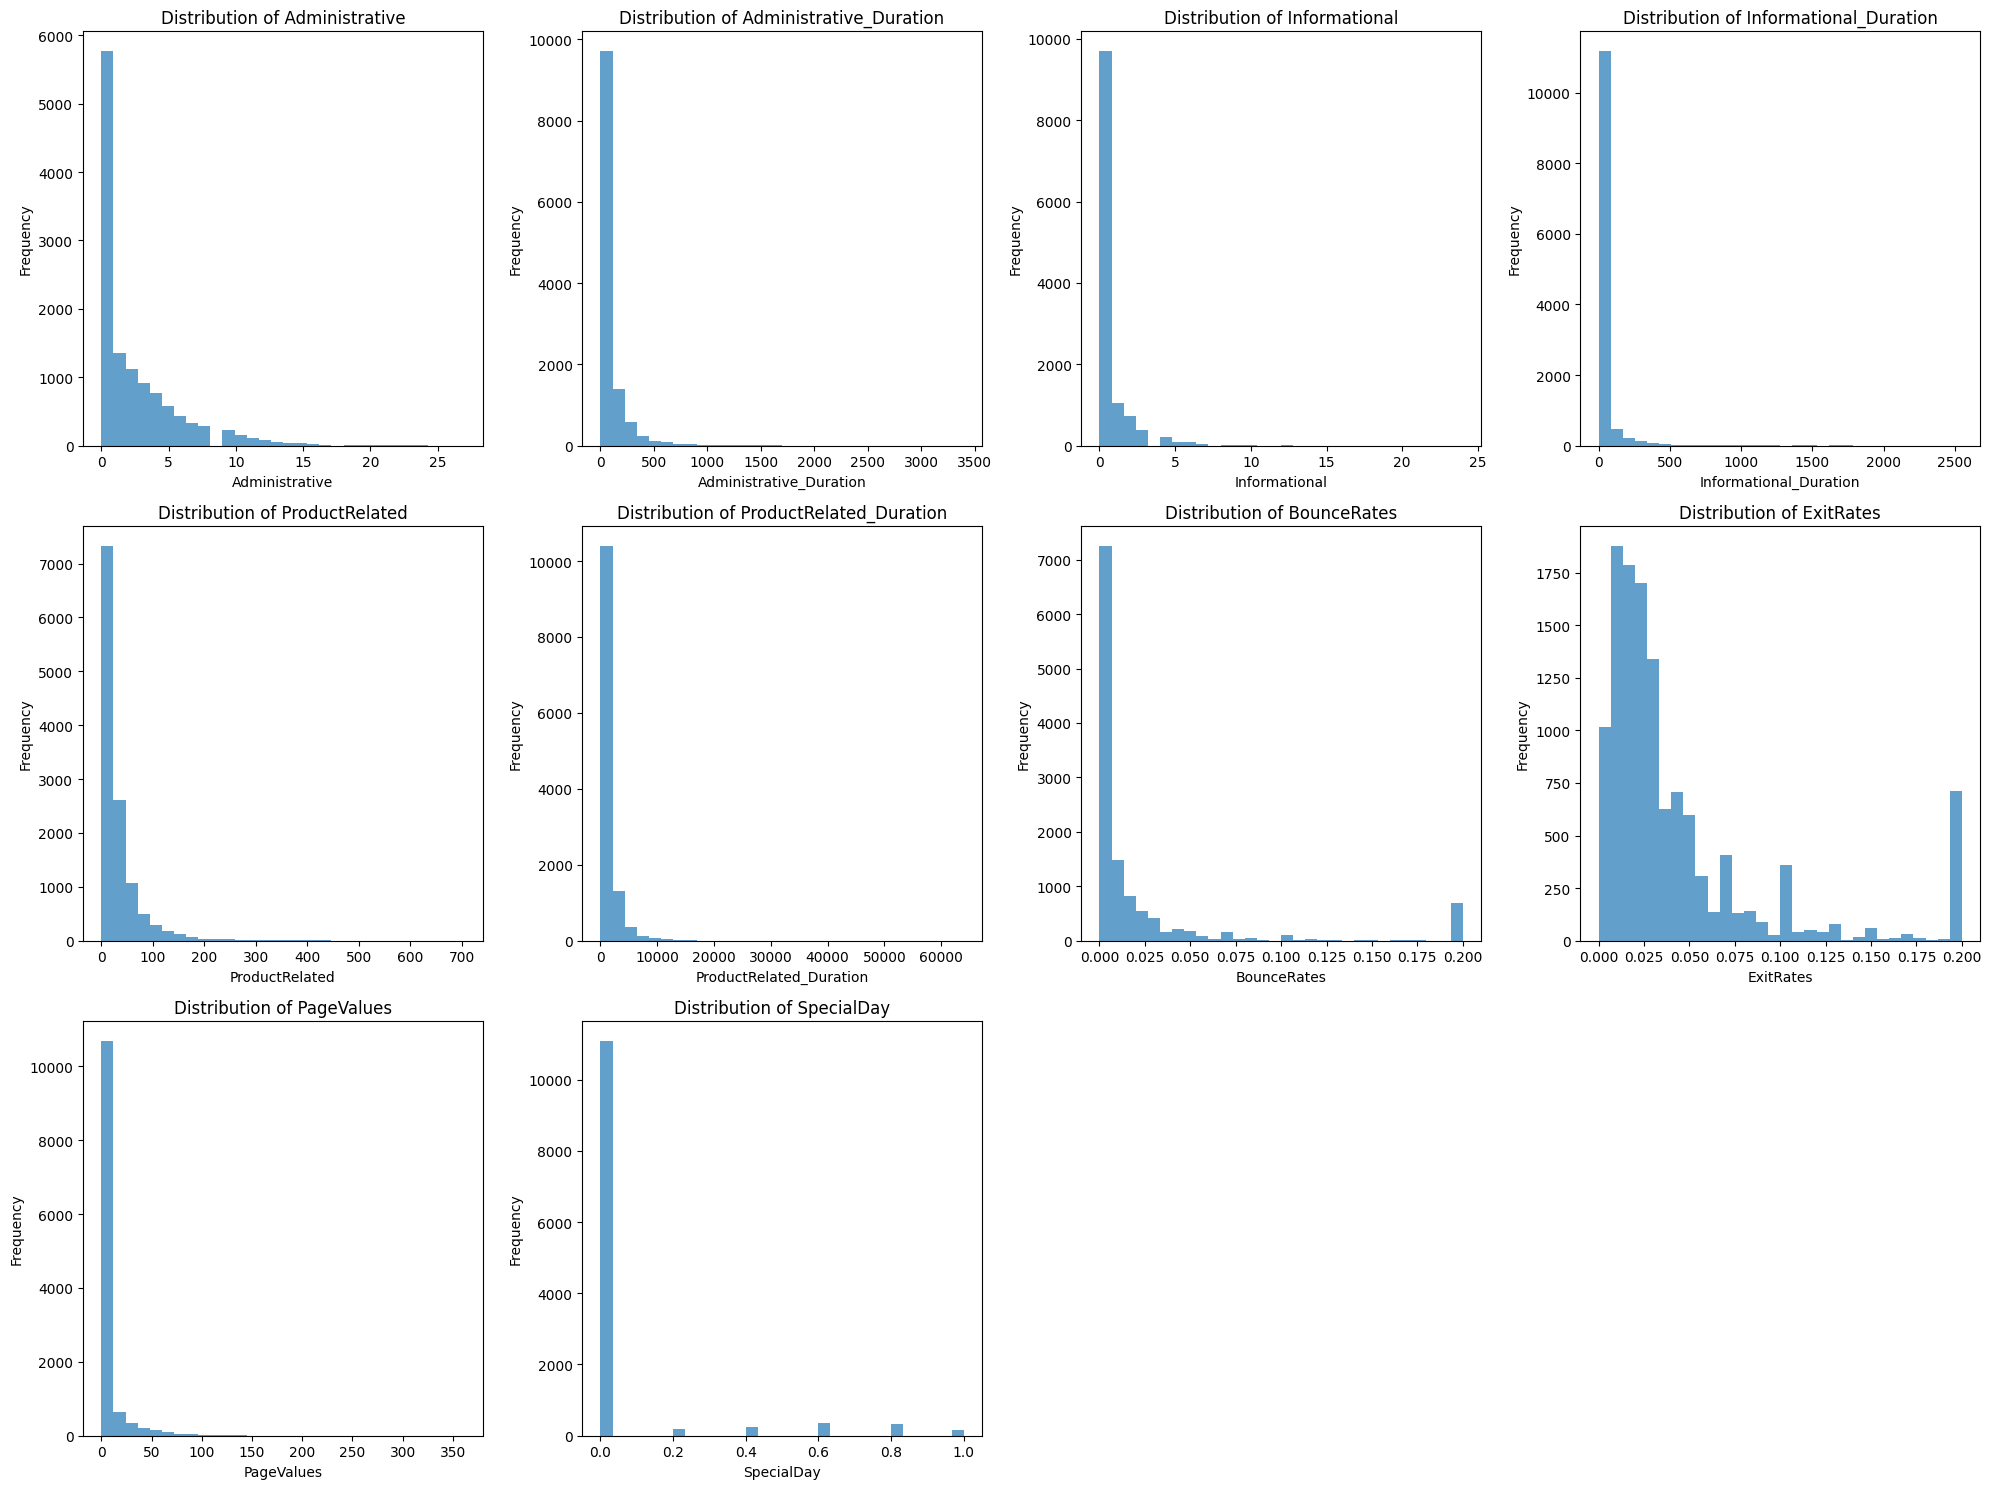

In [26]:

numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational',
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        axes[i].hist(df[col], bins=30, alpha=0.7)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


 Correlation Analysis

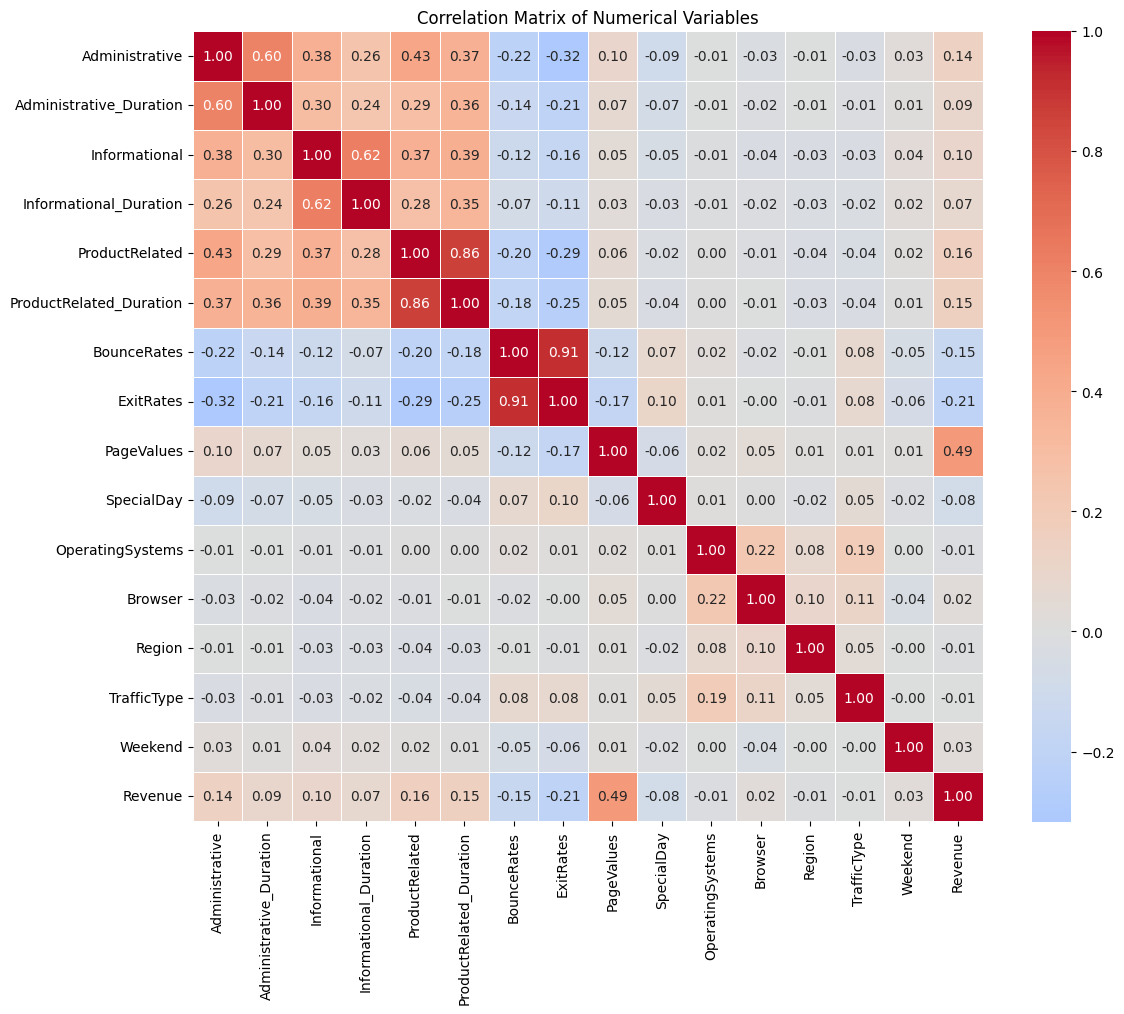

Correlations with Revenue:
Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


In [27]:

df_corr = df.copy()
df_corr['Revenue'] = df_corr['Revenue'].astype(int)
df_corr['Weekend'] = df_corr['Weekend'].astype(int)

numerical_df = df_corr.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

print("Correlations with Revenue:")
revenue_corr = correlation_matrix['Revenue'].sort_values(ascending=False)
print(revenue_corr)


Revenue by Categorical Variables

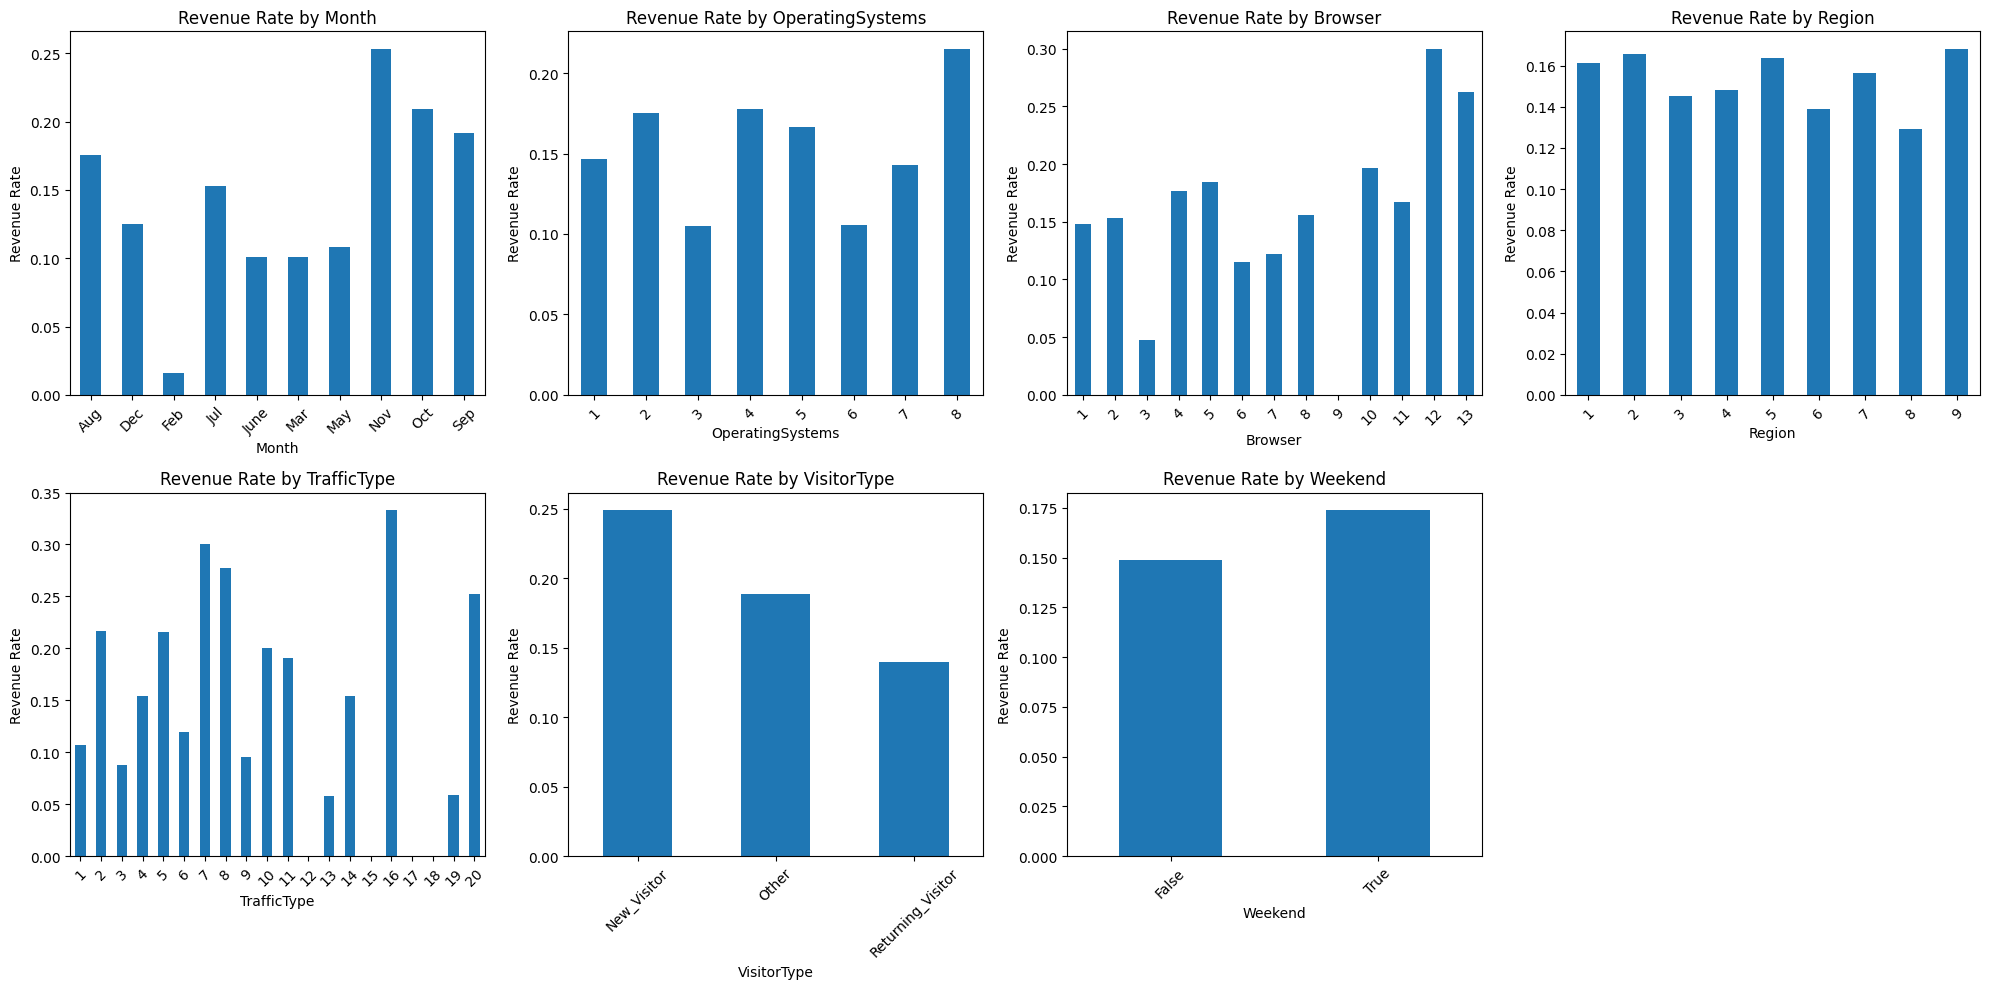

In [28]:

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        revenue_by_cat = df.groupby(col)['Revenue'].mean()
        revenue_by_cat.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Revenue Rate by {col}')
        axes[i].set_ylabel('Revenue Rate')
        axes[i].tick_params(axis='x', rotation=45)


if len(categorical_cols) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


Data Preprocessing

In [29]:

df_processed = df.copy()

df_processed['Weekend'] = df_processed['Weekend'].astype(int)
df_processed['Revenue'] = df_processed['Revenue'].astype(int)

label_encoders = {}
categorical_columns = ['Month', 'VisitorType']

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

df_processed = df_processed.drop(categorical_columns, axis=1)

print("Data preprocessing completed!")
print("New shape:", df_processed.shape)
print("Columns:", df_processed.columns.tolist())


Data preprocessing completed!
New shape: (12330, 18)
Columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue', 'Month_encoded', 'VisitorType_encoded']


Feature Selection and Model Preparation

In [30]:

X = df_processed.drop('Revenue', axis=1)
y = df_processed['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split completed!")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Target distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))


Data split completed!
Training set shape: (9864, 17)
Test set shape: (2466, 17)
Target distribution in training set:
Revenue
0    0.845296
1    0.154704
Name: proportion, dtype: float64


Model Training and Evaluation

In [31]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_predictions = rf_model.predict(X_test_scaled)

print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

lr_predictions = lr_model.predict(X_test_scaled)

print("\n" + "="*50)
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_predictions))


Random Forest Results:
Accuracy: 0.9015

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2084
           1       0.73      0.58      0.65       382

    accuracy                           0.90      2466
   macro avg       0.83      0.77      0.79      2466
weighted avg       0.90      0.90      0.90      2466


Logistic Regression Results:
Accuracy: 0.8832

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.76      0.36      0.49       382

    accuracy                           0.88      2466
   macro avg       0.83      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



Feature Importance Analysis

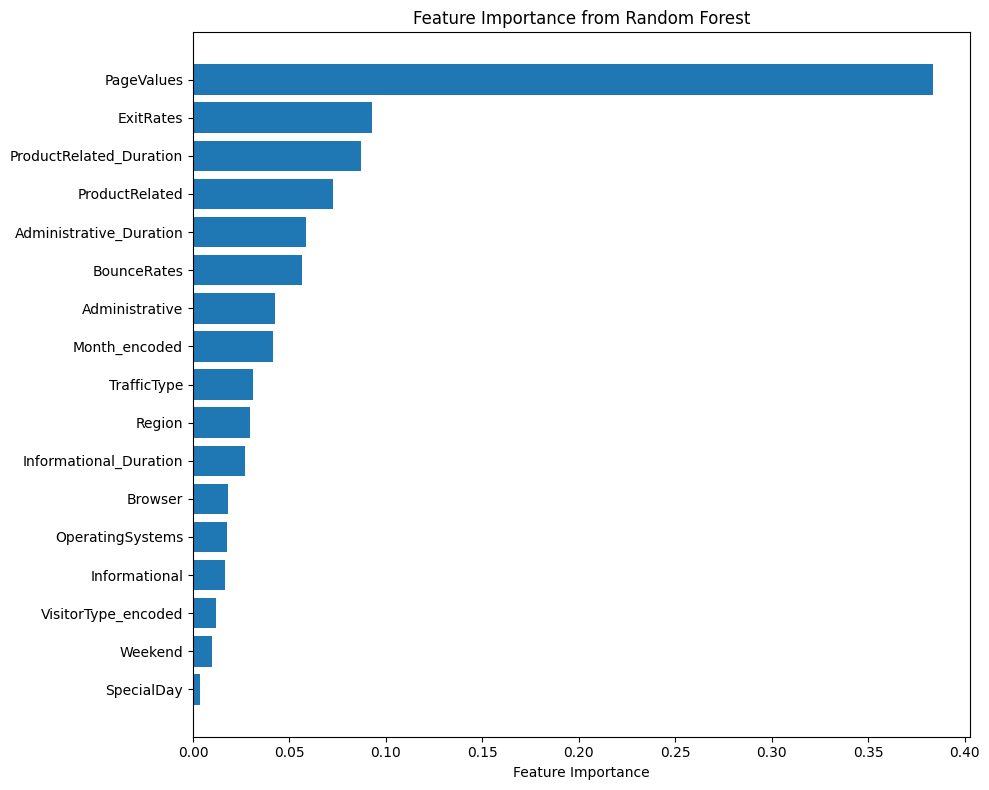

Top 10 Most Important Features:
                    feature  importance
8                PageValues    0.383381
7                 ExitRates    0.092762
5   ProductRelated_Duration    0.087060
4            ProductRelated    0.072796
1   Administrative_Duration    0.058626
6               BounceRates    0.056442
0            Administrative    0.042372
15            Month_encoded    0.041390
13              TrafficType    0.031096
12                   Region    0.029499


In [32]:

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10))


Confusion Matrix Visualization

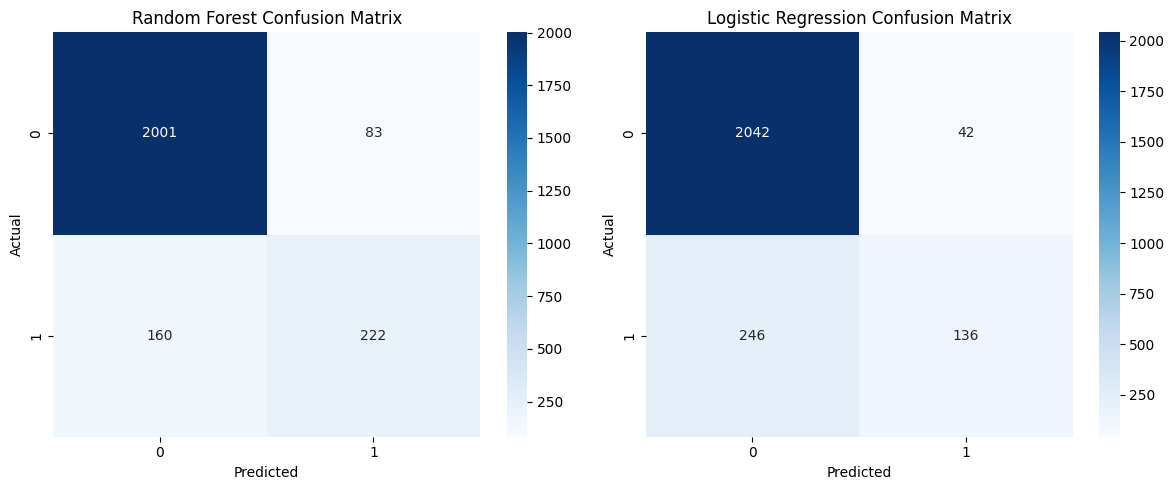

In [33]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

cm_lr = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm_lr, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


Save Results

In [34]:

df_processed.to_csv('../data/processed_data/processed_shoppers_data.csv', index=False)

results_summary = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, rf_predictions), accuracy_score(y_test, lr_predictions)]
})

print("Model Comparison:")
print(results_summary)

feature_importance.to_csv('feature_importance.csv', index=False)
print("\nFiles saved:")
print("- processed_shoppers_data.csv")
print("- feature_importance.csv")


Model Comparison:
                 Model  Accuracy
0        Random Forest  0.901460
1  Logistic Regression  0.883212

Files saved:
- processed_shoppers_data.csv
- feature_importance.csv


Single Sample Prediction Function

In [35]:
def predict_purchase_intention(administrative=0, administrative_duration=0.0, informational=0,
                              informational_duration=0.0, product_related=1, product_related_duration=100.0,
                              bounce_rates=0.01, exit_rates=0.05, page_values=0.0, special_day=0.0,
                              month=5, operating_systems=1, browser=1, region=1, traffic_type=1,
                              visitor_type=1, weekend=0):
    """
    Predict purchase intention for a single user session

    Parameters:
    - All the features from your dataset
    - Use encoded values for categorical variables

    Returns:
    - Prediction (0 or 1) and probability
    """


    input_data = np.array([[administrative, administrative_duration, informational,
                           informational_duration, product_related, product_related_duration,
                           bounce_rates, exit_rates, page_values, special_day, month,
                           operating_systems, browser, region, traffic_type, visitor_type, weekend]])


    input_scaled = scaler.transform(input_data)


    rf_prediction = rf_model.predict(input_scaled)[0]
    rf_probability = rf_model.predict_proba(input_scaled)[0][1]

    lr_prediction = lr_model.predict(input_scaled)[0]
    lr_probability = lr_model.predict_proba(input_scaled)[0][1]

    return {
        'Random Forest': {'prediction': rf_prediction, 'probability': rf_probability},
        'Logistic Regression': {'prediction': lr_prediction, 'probability': lr_probability}
    }

result = predict_purchase_intention(
    administrative=5,
    product_related=20,
    product_related_duration=500.0,
    page_values=15.5,
    bounce_rates=0.02,
    exit_rates=0.03
)

print("Purchase Intention Prediction:")
print(f"Random Forest: {'Will Purchase' if result['Random Forest']['prediction'] == 1 else 'Will Not Purchase'}")
print(f"Confidence: {result['Random Forest']['probability']:.2%}")
print(f"\nLogistic Regression: {'Will Purchase' if result['Logistic Regression']['prediction'] == 1 else 'Will Not Purchase'}")
print(f"Confidence: {result['Logistic Regression']['probability']:.2%}")


Purchase Intention Prediction:
Random Forest: Will Purchase
Confidence: 73.00%

Logistic Regression: Will Not Purchase
Confidence: 16.08%


Interactive Prediction with Multiple Scenarios

In [36]:

scenarios = [
    {
        'name': '🛒 High-Intent Customer',
        'data': {
            'administrative': 3, 'product_related': 25, 'product_related_duration': 800.0,
            'page_values': 25.0, 'bounce_rates': 0.01, 'exit_rates': 0.02,
            'visitor_type': 0  # Returning visitor
        }
    },
    {
        'name': '👀 Browser (Low Intent)',
        'data': {
            'administrative': 1, 'product_related': 5, 'product_related_duration': 150.0,
            'page_values': 0.0, 'bounce_rates': 0.15, 'exit_rates': 0.20,
            'visitor_type': 1  # New visitor
        }
    },
    {
        'name': '🎯 Medium Intent Customer',
        'data': {
            'administrative': 2, 'product_related': 12, 'product_related_duration': 400.0,
            'page_values': 8.5, 'bounce_rates': 0.05, 'exit_rates': 0.08,
            'visitor_type': 0  # Returning visitor
        }
    }
]

print("Customer Purchase Intention Predictions:\n")
print("-" * 60)

for scenario in scenarios:
    print(f"\n{scenario['name']}")
    print("=" * 30)

    result = predict_purchase_intention(**scenario['data'])

    rf_prob = result['Random Forest']['probability']
    lr_prob = result['Logistic Regression']['probability']

    print(f"Random Forest Probability: {rf_prob:.2%}")
    print(f"Logistic Regression Probability: {lr_prob:.2%}")
    print(f"Average Confidence: {(rf_prob + lr_prob)/2:.2%}")

    if (rf_prob + lr_prob)/2 > 0.5:
        print("Prediction: LIKELY TO PURCHASE")
    else:
        print("Prediction: UNLIKELY TO PURCHASE")

    print("-" * 30)


Customer Purchase Intention Predictions:

------------------------------------------------------------

🛒 High-Intent Customer
Random Forest Probability: 57.00%
Logistic Regression Probability: 32.18%
Average Confidence: 44.59%
Prediction: UNLIKELY TO PURCHASE
------------------------------

👀 Browser (Low Intent)
Random Forest Probability: 4.00%
Logistic Regression Probability: 0.20%
Average Confidence: 2.10%
Prediction: UNLIKELY TO PURCHASE
------------------------------

🎯 Medium Intent Customer
Random Forest Probability: 40.00%
Logistic Regression Probability: 3.66%
Average Confidence: 21.83%
Prediction: UNLIKELY TO PURCHASE
------------------------------


Batch Prediction on Test Set

In [37]:

rf_test_predictions = rf_model.predict(X_test_scaled)
rf_test_probabilities = rf_model.predict_proba(X_test_scaled)[:, 1]

lr_test_predictions = lr_model.predict(X_test_scaled)
lr_test_probabilities = lr_model.predict_proba(X_test_scaled)[:, 1]

results_df = pd.DataFrame({
    'Actual': y_test.values,
    'RF_Prediction': rf_test_predictions,
    'RF_Probability': rf_test_probabilities,
    'LR_Prediction': lr_test_predictions,
    'LR_Probability': lr_test_probabilities
})


results_df['RF_Confidence'] = pd.cut(results_df['RF_Probability'],
                                   bins=[0, 0.3, 0.7, 1.0],
                                   labels=['Low', 'Medium', 'High'])

print("Batch Prediction Results Summary:")
print("\nRandom Forest Predictions by Confidence Level:")
print(results_df.groupby('RF_Confidence').agg({
    'RF_Prediction': 'count',
    'Actual': lambda x: (x == 1).sum()
}).rename(columns={'RF_Prediction': 'Total_Predictions', 'Actual': 'Actual_Purchases'}))

print("\nHigh-Confidence Purchase Predictions (Top 10):")
high_confidence = results_df[results_df['RF_Probability'] > 0.8].head(10)
print(high_confidence[['Actual', 'RF_Probability', 'LR_Probability']])


Batch Prediction Results Summary:

Random Forest Predictions by Confidence Level:
               Total_Predictions  Actual_Purchases
RF_Confidence                                     
Low                         1382                96
Medium                       346               167
High                         134               115

High-Confidence Purchase Predictions (Top 10):
     Actual  RF_Probability  LR_Probability
10        1            0.87        0.937270
11        1            0.91        0.917827
21        1            0.91        0.474042
47        1            0.82        0.216548
53        1            0.99        0.585674
119       1            0.93        0.997475
160       1            0.91        0.193072
176       1            0.82        0.891258
192       1            0.94        0.364394
194       1            0.91        0.603790


Feature Importance for Predictions

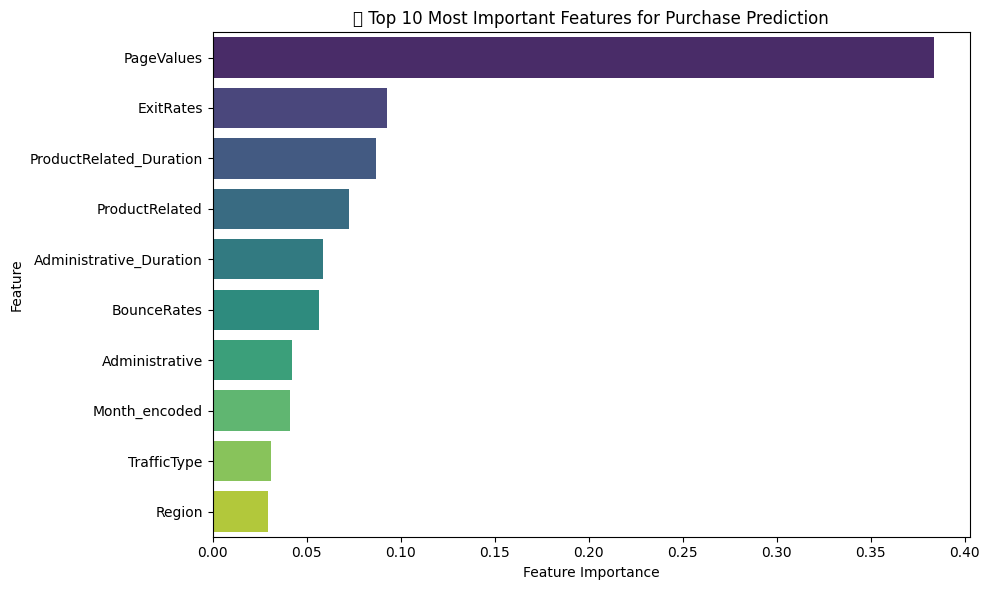

Feature Importance Rankings:
 9. PageValues                0.3834
 8. ExitRates                 0.0928
 6. ProductRelated_Duration   0.0871
 5. ProductRelated            0.0728
 2. Administrative_Duration   0.0586
 7. BounceRates               0.0564
 1. Administrative            0.0424
16. Month_encoded             0.0414
14. TrafficType               0.0311
13. Region                    0.0295

Key Insights for Predictions:
Most Important: PageValues - Focus on this metric!
Second Most: ExitRates - Also very predictive
Third Most: ProductRelated_Duration - Strong indicator


In [38]:

feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualize top 10 most important features
plt.figure(figsize=(10, 6))
top_features = importance_df.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title('🎯 Top 10 Most Important Features for Purchase Prediction')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

print("Feature Importance Rankings:")
for i, row in importance_df.head(10).iterrows():
    print(f"{row.name+1:2d}. {row['Feature']:<25} {row['Importance']:.4f}")

# Interpretation guide
print(f"\nKey Insights for Predictions:")
print(f"Most Important: {importance_df.iloc[0]['Feature']} - Focus on this metric!")
print(f"Second Most: {importance_df.iloc[1]['Feature']} - Also very predictive")
print(f"Third Most: {importance_df.iloc[2]['Feature']} - Strong indicator")


Save Models for Future Use

In [39]:
import joblib
import pickle
from datetime import datetime

model_info = {
    'created_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'rf_accuracy': accuracy_score(y_test, rf_test_predictions),
    'lr_accuracy': accuracy_score(y_test, lr_test_predictions),
    'feature_names': list(X_train.columns),
    'encoding_info': {
        'Month': 'Label encoded (Jan=0, Feb=1, ...)',
        'VisitorType': 'New_Visitor=0, Returning_Visitor=1',
        'Weekend': 'False=0, True=1',
        'Revenue': 'False=0, True=1'
    }
}

# Save models and preprocessing components
joblib.dump(rf_model, '../models/random_forest_model.pkl')
joblib.dump(lr_model, '../models/logistic_regression_model.pkl')
joblib.dump(scaler, '../models/feature_scaler.pkl')

# Save model info as JSON
import json
with open('../outputs/model_info.json', 'w') as f:
    json.dump(model_info, f, indent=2)

print("Models Saved Successfully!")
print("Files created:")
print("   - random_forest_model.pkl")
print("   - logistic_regression_model.pkl")
print("   - feature_scaler.pkl")
print("   - model_info.json")

loaded_rf = joblib.load('../models/random/random_forest_model.pkl')
loaded_scaler = joblib.load('../models/feature/feature_scaler.pkl')
print("\nModel loading test: SUCCESS")


Models Saved Successfully!
Files created:
   - random_forest_model.pkl
   - logistic_regression_model.pkl
   - feature_scaler.pkl
   - model_info.json

Model loading test: SUCCESS
